# Определение перспективного тарифа для телеком компании

На базе данных от компании "Мегалайн", надо провести предварительный анализ тарифов на небольшой выборке клиентов. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

> Цель данного проекта: проанализировать поведение клиента и на базе данного анализа сделать вывод о том, какой тариф лучше.

Задачи:
* Изучить файлы с данными, общую информацию;
* Заменить тип данных, заполнить пропуски, выявить ошибки/аномальные данные.
* Подготовить пользовательские данные(кол-во сделанных звонок и израсходованных минут, кол-во отправленных сообщений, объем израсходонного интернет-трафика, выручку с каждого пользователя);
* Анализ и описание данных
* Проверка гипотез:
    * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

1. [Открытие данных](#start)
2. [Предобработка данных](#preprocessing)
    * [Изменение типов данных](#types)
    * [Обработка пропущенных значений](#null)
    * [Расчет дополнительных данных](#adding)
3. [Анализ данных](#analysis)
4. [Проверка гипотез](#hypothesis)
5. [Вывод](#conclusion)

<a id='start'></a>
### 1. Изучение файлов с данными и общей информации по ним. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import plotly.express as px
import seaborn as sns


In [5]:
calls = pd.read_csv("/Users/valeriyaniskorodova/Y.Praktikum/Sprint 3/calls.csv")

In [6]:
#calls = pd.read_csv("/datasets/calls.csv")

In [7]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Сразу проверим, нет ли пробелов в названиях столбцов и перемеименуем первый столбцец.

In [8]:
calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [9]:
calls.set_axis(['call_id', 'call_date', 'duration', 'user_id'], axis='columns', inplace=True)
calls.head()

,call_id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [10]:
internet = pd.read_csv("/Users/valeriyaniskorodova/Y.Praktikum/Sprint 3/internet.csv")

In [11]:
#internet = pd.read_csv("/datasets/internet.csv")

In [12]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [13]:
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

У нас есть столбец 	Unnamed: 0, который повторяет индексы нашего датасета. Удалим его и переименуем столбец id в более информативное название.

In [14]:
internet.drop(columns='Unnamed: 0', inplace=True)

In [15]:
internet.set_axis(['session_id', 'mb_used', 'session_date', 'user_id'], axis='columns', inplace=True)

In [16]:
internet

,session_id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [17]:
messages = pd.read_csv("/Users/valeriyaniskorodova/Y.Praktikum/Sprint 3/messages.csv")

In [18]:
#messages = pd.read_csv("/datasets/messages.csv")

In [19]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [20]:
messages.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

In [21]:
messages.set_axis(['message_id', 'message_date', 'user_id'], axis='columns', inplace=True)

In [22]:
messages.head()

,message_id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [23]:
users = pd.read_csv("/Users/valeriyaniskorodova/Y.Praktikum/Sprint 3/users.csv")

In [24]:
#users = pd.read_csv("/datasets/users.csv")

In [25]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [26]:
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [27]:
tariffs = pd.read_csv("/Users/valeriyaniskorodova/Y.Praktikum/Sprint 3/tariffs.csv")

In [28]:
#tariffs = pd.read_csv("/datasets/tariffs.csv")

In [29]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [30]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

Поменяем название столбца tariff_name на tariff, так как в прошлой таблице название столбца такое и по данному столбцу в будущем мы будем объединять наши датасеты.

In [31]:
tariffs.set_axis(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff'], axis='columns', inplace=True)

In [32]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


 В нашем распоряжении есть пять табличек с данными о пользователях оператора сотовой связи "Мегалайн":
 
* **calls.csv** - информация о звонках
* **internet.csv** - информация об интернет-сессиях
* **messages.csv** - информация о сообщениях
* **tariffs.csv** - информация о тарифах
* **users.csv** - информация о пользователях

Таблицы **calls, internet, messages, users** связаны между собой столбцом **user_id** (идентификатор пользователя), а таблицы **users и tariffs** - столбцом **tariff/tariff_name**(названием тарифа).

In [33]:
# Цикл для вывода информации о таблицах 
for name in [calls, internet, messages, tariffs, users]:
    name.info()
    print(end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   call_id    202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   session_id    149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Coun

Надо будет поменять тип данных в столбцах с датой и временем, а также, так как «Мегалайн» всегда округляет вверх значения минут и мегабайтов, то нам нужно округлить значения минут разговора и потраченные мегабайты за сессию в интернете в большую сторону.

Можно сразу заметить, что в некоторых таблицах разное количество столбцов, а значит это могут быть дубликаты, то есть один пользователь отправил несколько сообщений. При объединении таблиц могут возникнуть пропущенные значения, которые надо будет заполнить нулями,так как в определенные дни клиент могне отправлять сообщений никому.

<a id='preprocessing'></a>
### Шаг 2. Предобработка данных

<a id='types'></a>
#### Замена типов данных

В таблице **calls** заменю тип данных в столбце user_id, так как надо избежать математических операций в данном столбце, приведу столбец call_date к типу datetime, округлю значения вверх в столбце duration и приведу к типу int, так как нам уже не нужна десятичная часть чисел.

In [34]:
types_dic = {'user_id':'str',
            'duration':'int'}
calls = calls.astype(types_dic)
calls['call_date'] = pd.to_datetime(calls['call_date'], format="%Y-%m-%d")
calls['duration'] = np.ceil(calls['duration'])

In [35]:
calls.head()

,call_id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,2.0,1000
3,1000_3,2018-09-21,13.0,1000
4,1000_4,2018-12-15,5.0,1000


В таблице **internet** меняю тип столбца user_id, привожу столбец session_date к типу datetime, округляю значения столбца mb_used вверх и привожу его к типу int. 

In [36]:
types2_dict = {'user_id':'str',
               'mb_used':'int' 
}
internet = internet.astype(types2_dict)

In [37]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format="%Y-%m-%d")
internet['mb_used'] = np.ceil(internet['mb_used'])

In [38]:
internet.head()

,session_id,mb_used,session_date,user_id
0,1000_0,112.0,2018-11-25,1000
1,1000_1,1052.0,2018-09-07,1000
2,1000_2,1197.0,2018-06-25,1000
3,1000_3,550.0,2018-08-22,1000
4,1000_4,302.0,2018-09-24,1000


В таблице **messages** заменяю тип в столбце user_id и в столбце message_date - на datetime. 

In [39]:
messages['user_id'] = messages['user_id'].astype('str')
messages['message_date'] = pd.to_datetime(messages['message_date'], format="%Y-%m-%d")

In [40]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   message_id    123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.8+ MB


В столбце **users** заменяю в столбце user_id тип данных, и столбцы churn_date и reg_date привожу к типу datetime. Привожу все слова в столбцах к нижнему регистру, для удобной работы со столбцами со строками.

In [41]:
users['user_id'] = users['user_id'].astype('str')
users['churn_date'] = pd.to_datetime(users['churn_date'], format="%Y-%m-%d")
users['reg_date'] = pd.to_datetime(users['reg_date'], format="%Y-%m-%d")

In [42]:
for name in ['city', 'first_name', 'last_name']:
    users[name] = users[name].str.lower()

In [43]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


Хорошо, все данные приведны к нужному типу, передем к предобработке данных в таблицах.

<a id='null'></a>
### Обработка пропусков

Таблица  ***calls***.

In [44]:
calls.head()

,call_id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,2.0,1000
3,1000_3,2018-09-21,13.0,1000
4,1000_4,2018-12-15,5.0,1000


In [45]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_id    202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB


Пропущенных значений в данной таблице нет, но посмотрю на срез, в котором длительность звонка равно 0.

In [46]:
print('Количество звонков, с длительностью, равной 0: {}'.format(len(calls[calls['duration'] == 0])))


Количество звонков, с длительностью, равной 0: 47927


Таких данных 19 процентов от всего столбца. Так как таблица с информацией о звонках не имеет разделения на входящие и исходящие звонки, данная ошибка могла возникнуть, так как такие звонки считаются непринятыми абонентом.

Посмотрю, как зависит количество звонком со значением 0 от количества всех звонков.

In [47]:
def isnull(row):
    
    duration = row['duration']
    
    if duration == 0:
        return 1
    else:
        return 0 
calls['isnull'] = calls.apply(isnull, axis=1)

In [48]:
calls['month'] = calls['call_date'].dt.month
calls

,call_id,call_date,duration,user_id,isnull,month
0,1000_0,2018-07-25,0.0,1000,1,7
1,1000_1,2018-08-17,0.0,1000,1,8
2,1000_2,2018-06-11,2.0,1000,0,6
3,1000_3,2018-09-21,13.0,1000,0,9
4,1000_4,2018-12-15,5.0,1000,0,12
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.0,1499,1,12
202603,1499_216,2018-10-18,18.0,1499,0,10
202604,1499_217,2018-11-10,10.0,1499,0,11
202605,1499_218,2018-10-06,4.0,1499,0,10


In [49]:
call_amount = calls.groupby(by='month').agg({'duration':'count', 'isnull':'sum'})
call_amount

,duration,isnull
month,,
1,1476,362
2,3328,753
3,6687,1573
4,9272,2165
5,12647,3092
6,14716,3480
7,18298,4261
8,21488,5100
9,24061,5538


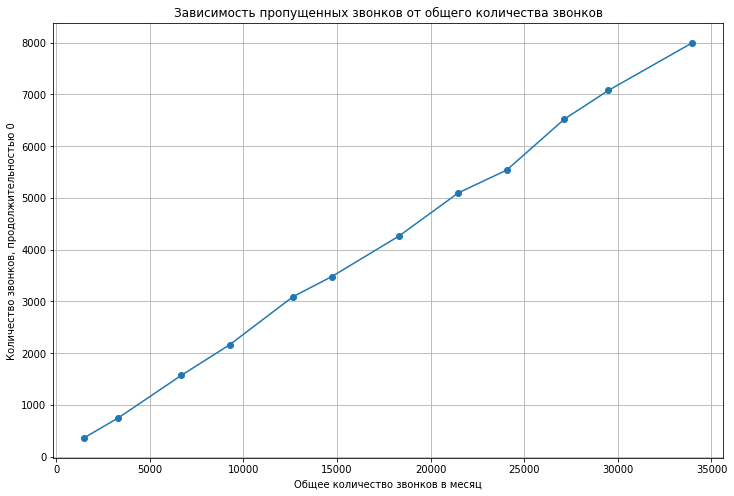

In [51]:
plt.figure(figsize=(12, 8))
plt.plot( call_amount['duration'], call_amount['isnull'], 'o-')
plt.xlabel("Общее количество звонков в месяц")
plt.ylabel("Количество звонков, продолжительностью 0")
plt.title('Зависимость пропущенных звонков от общего количества звонков')
plt.grid()
plt.show()

Видно, что зависимость почти линейная,количество звонков продолжительностью 0 растет вместе с общим количеством звонков.

Удалять такие столбцы будет потерей важных данных в остальных столбцах, а заменять на отвлеченные значения - не совсем правильный подход в данной ситуации. Поэтому я оставлю данные неизмененными. На среднее медианное значение эти данные не повлияют.

Таблица ***internet***

In [52]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.6+ MB


In [53]:
print("Объем интернет трафика, равный 0: {}".format(len(internet[internet['mb_used'] == 0])))

Объем интернет трафика, равный 0: 19699


Нулевые значения могли появится из-за того, что клиенты могут вообще не пользоваться мобильным интернетом в течении месяца.

Как и со звонками, посмотрю на зависимость количества интернет сессий за месяц и таких сессий, где объем потраченного трафика был равен нулю.

In [54]:
internet['month'] = internet['session_date'].dt.month
internet

,session_id,mb_used,session_date,user_id,month
0,1000_0,112.0,2018-11-25,1000,11
1,1000_1,1052.0,2018-09-07,1000,9
2,1000_2,1197.0,2018-06-25,1000,6
3,1000_3,550.0,2018-08-22,1000,8
4,1000_4,302.0,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.0,2018-10-03,1499,10
149392,1499_153,490.0,2018-12-14,1499,12
149393,1499_154,0.0,2018-10-27,1499,10
149394,1499_155,1246.0,2018-11-26,1499,11


In [55]:
def isnull_mb(row):
    mb_used = row['mb_used']
    
    if mb_used == 1:
        return 1
    else:
        return 0
internet['isnull_mb'] = internet.apply(isnull_mb, axis=1)

In [56]:
internet_amount = internet.groupby(by='month').agg({'mb_used':'count', 'isnull_mb':'sum'})
internet_amount

,mb_used,isnull_mb
month,,
1,1117,0
2,2641,0
3,4885,1
4,6511,2
5,9408,4
6,11057,5
7,13548,10
8,16092,9
9,17512,15


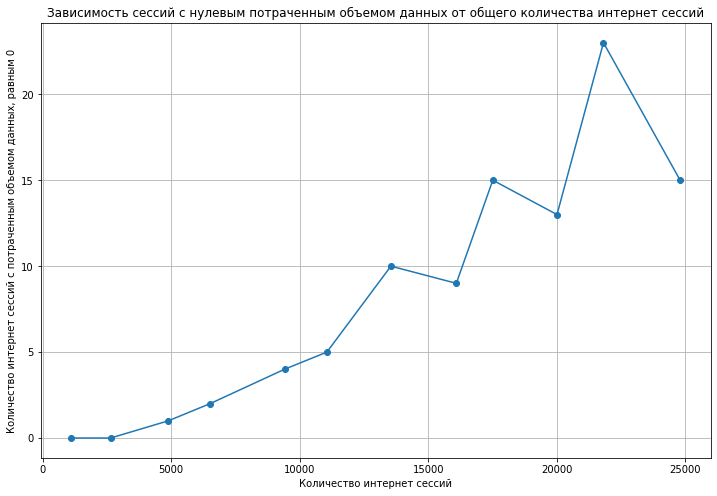

In [59]:
plt.figure(figsize=(12, 8))
plt.plot(internet_amount['mb_used'], internet_amount['isnull_mb'], '-o')
plt.xlabel("Количество интернет сессий")
plt.ylabel("Количество интернет сессий c потраченным объемом данных, равным 0")
plt.title('Зависимость сессий с нулевым потраченным объемом данных от общего количества интернет сессий')
plt.grid()
plt.show()

Зависимость количеcтва интернет сессий от количества сессий, где потраченный объем равен 0, имеет определенные данные, которые отличные от линейного характера. В общем, мы все равно можем сказать, что с ростом количества интернет сессий, растет количество нулевых сессий, местами нелиненйно.

Как с таблицей calls, я оставлю эти значения нетронутыми, в дальнейшем, при анализе отфильтрую их, удалять я их не стала, так как они занимают 13% от всего столбца, что может привести к потере других важных данных и искажению результата.

Таблица ***users***.

In [60]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    object        
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB


Пропущенные значения есть только в столбце churn_date. Пропущенные значения в этом столбце означают то, что во время выгрузки данных, этот тариф был действующим.  Данные значения я могу оставить, так как в исследовании нам не понадобится дата, а значит пропущенные значения нам никак не будут мешать.

<a id='adding'></a>
#### Расчет дополнительных данных.

Объеденим таблицы и рассчитаем для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.

In [61]:
calls.shape

(202607, 6)

In [62]:
users.shape

(500, 8)

In [63]:
# Объединяю таблицы calls и user
users_calls = calls.merge(users,on=['user_id'],how='inner')

In [68]:
group_calls = users_calls.pivot_table(index=['user_id', 'month','tariff','city'],\
                                      values=['duration'], aggfunc=['count', 'sum'])
group_calls.columns=['The number of calls', 'The number of minutes']

In [69]:
group_calls.head(10)

The number of calls  The number of minutes
user_id month tariff city                                                 
1000    5     ultra  краснодар                   22                  142.0
        6     ultra  краснодар                   43                  144.0
        7     ultra  краснодар                   47                  299.0
        8     ultra  краснодар                   52                  367.0
        9     ultra  краснодар                   58                  421.0
        10    ultra  краснодар                   57                  306.0
        11    ultra  краснодар                   43                  301.0
        12    ultra  краснодар                   46                  295.0
1001    11    smart  москва                      59                  385.0
        12    smart  москва                      63                  367.0

Получила таблицу с информацией о количестве сделанных звонков и израсходованных минут в месяц каждым пользователем.

In [70]:
messages['month'] = messages['message_date'].dt.month

In [71]:
# Объединяю таблицы messages и user
users_messages = messages.merge(users,on=['user_id'],how='inner')


In [72]:
# Создаю столбец с информацией о пользователе (город, имя и фамилия)
users_messages['unique_name'] = users_messages['city'] + [' '] +\
users_messages['first_name'] + [' ']+ users_messages['last_name']

In [73]:
group_messages = users_messages.pivot_table(index=['user_id', 'month', 'tariff', 'city'],\
                                            values=['unique_name'], aggfunc=['count'])
group_messages.columns=['The number of messages']
group_messages.head(10)

The number of messages
user_id month tariff city                               
1000    5     ultra  краснодар                        22
        6     ultra  краснодар                        60
        7     ultra  краснодар                        75
        8     ultra  краснодар                        81
        9     ultra  краснодар                        57
        10    ultra  краснодар                        73
        11    ultra  краснодар                        58
        12    ultra  краснодар                        70
1002    6     smart  стерлитамак                       4
        7     smart  стерлитамак                      11

Получила таблицу с информацией о количестве отправленных сообщений по месяцам.

In [74]:
# Объединяю таблицы messages и user
users_internet = internet.merge(users,on=['user_id'],how='inner')

In [75]:
group_internet = users_internet.pivot_table(index=['user_id', 'month', 'tariff', 'city'],\
                                            values=['mb_used'], aggfunc='sum')
group_internet.columns=['Consumed Internet traffic']
group_internet.head(10)

Consumed Internet traffic
user_id month tariff city                                
1000    5     ultra  краснодар                     2252.0
        6     ultra  краснодар                    23213.0
        7     ultra  краснодар                    13988.0
        8     ultra  краснодар                    14043.0
        9     ultra  краснодар                    14556.0
        10    ultra  краснодар                    14690.0
        11    ultra  краснодар                    14745.0
        12    ultra  краснодар                     9808.0
1001    11    smart  москва                       18405.0
        12    smart  москва                       14018.0

Получила таблицу с информацией об израсходованном объеме интернет-трафика в месяц каждым пользователем.

Объеденю все таблички в одну.

In [76]:
group_calls.shape

(3174, 2)

In [77]:
group_internet.shape

(3203, 1)

In [78]:
group_messages.shape

(2717, 1)

In [79]:
group_data = group_calls.merge(group_messages, on=['user_id', 'month', 'tariff','city'],\
                               how='inner').merge(group_internet, on=['user_id', 'month', 'tariff', 'city'],\
                                                  how='inner')
group_data.reset_index(inplace=True)
group_data.head(10)

,user_id,month,tariff,city,The number of calls,The number of minutes,The number of messages,Consumed Internet traffic
0,1000,5,ultra,краснодар,22,142.0,22,2252.0
1,1000,6,ultra,краснодар,43,144.0,60,23213.0
2,1000,7,ultra,краснодар,47,299.0,75,13988.0
3,1000,8,ultra,краснодар,52,367.0,81,14043.0
4,1000,9,ultra,краснодар,58,421.0,57,14556.0
5,1000,10,ultra,краснодар,57,306.0,73,14690.0
6,1000,11,ultra,краснодар,43,301.0,58,14745.0
7,1000,12,ultra,краснодар,46,295.0,70,9808.0
8,1002,6,smart,стерлитамак,15,103.0,4,10844.0
9,1002,7,smart,стерлитамак,26,193.0,11,17557.0


Осталось рассчитать помесячную выручку с каждого пользователя.

In [80]:
group_data.shape

(2667, 8)

In [81]:
# Функция для расчета помесячной выручки
def proceed(row):
    
    calls = row['The number of calls']
    duration = row['The number of minutes']
    messages = row['The number of messages']
    mb = row['Consumed Internet traffic']
    tariff = row['tariff']
    
    if tariff == 'smart':
        extra_minutes = duration - tariffs.loc[0, 'minutes_included']
        extra_messages = messages - tariffs.loc[0, 'messages_included']
        extra_mb = mb - tariffs.loc[0, 'mb_per_month_included']
        
        if extra_minutes < 0:
            extra_minutes = 0
        if extra_messages < 0:
            extra_messages = 0
        if extra_mb < 0:
            extra_mb = 0
            
        proceed = extra_minutes * tariffs.loc[0, 'rub_per_minute'] +\
        extra_messages * tariffs.loc[0, 'rub_per_message'] +\
        extra_mb * tariffs.loc[0, 'rub_per_gb'] / 1024 + tariffs.loc[0, 'rub_monthly_fee'] 
        
    if tariff == 'ultra':
        extra_minutes = duration - tariffs.loc[1, 'minutes_included']
        extra_messages = messages - tariffs.loc[1, 'messages_included']
        extra_mb = mb - tariffs.loc[1, 'mb_per_month_included']
        
        if extra_minutes < 0:
            extra_minutes = 0
        if extra_messages < 0:
            extra_messages = 0
        if extra_mb < 0:
            extra_mb = 0
        if extra_mb > 0:
            extra_mb = np.ceil(extra_mb / 1024)
            
        proceed = extra_minutes * tariffs.loc[1, 'rub_per_minute'] +\
        extra_messages * tariffs.loc[1, 'rub_per_message'] +\
        extra_mb * tariffs.loc[1, 'rub_per_gb'] + tariffs.loc[1, 'rub_monthly_fee']
    
    return proceed


In [82]:
group_data['proceed'] = group_data.apply(proceed, axis=1)
group_data.head(10)

,user_id,month,tariff,city,The number of calls,The number of minutes,The number of messages,Consumed Internet traffic,proceed
0,1000,5,ultra,краснодар,22,142.0,22,2252.0,1950.000000
1,1000,6,ultra,краснодар,43,144.0,60,23213.0,1950.000000
2,1000,7,ultra,краснодар,47,299.0,75,13988.0,1950.000000
3,1000,8,ultra,краснодар,52,367.0,81,14043.0,1950.000000
4,1000,9,ultra,краснодар,58,421.0,57,14556.0,1950.000000
5,1000,10,ultra,краснодар,57,306.0,73,14690.0,1950.000000
6,1000,11,ultra,краснодар,43,301.0,58,14745.0,1950.000000
7,1000,12,ultra,краснодар,46,295.0,70,9808.0,1950.000000
8,1002,6,smart,стерлитамак,15,103.0,4,10844.0,550.000000
9,1002,7,smart,стерлитамак,26,193.0,11,17557.0,979.101562


<a id='analysis'></a>
### Шаг 3. Анализ данных

Посмотрим, сколько в среднем нужно каждому пользователю каждого из двух тарифов минут разговора, сообщений, объем интернет трафика.

In [84]:
avr_data = group_data.pivot_table(index=['user_id', 'tariff', 'city'],\
                                  values=['The number of minutes', 'The number of messages', 'Consumed Internet traffic', 'proceed'], aggfunc='median')
avr_data.reset_index(inplace=True)

In [85]:
avr_data.head(10)

,user_id,tariff,city,Consumed Internet traffic,The number of messages,The number of minutes,proceed
0,1000,ultra,краснодар,14299.5,65.0,300.0,1950.000000
1,1002,smart,стерлитамак,17557.0,11.0,193.0,979.101562
2,1003,ultra,москва,11348.0,83.0,729.0,1950.000000
3,1004,ultra,новокузнецк,17794.0,154.5,115.0,1950.000000
4,1005,smart,набережные челны,7823.5,49.0,531.0,649.000000
5,1007,smart,москва,14407.0,26.0,425.0,666.320312
6,1008,smart,челябинск,13199.0,56.0,298.0,568.000000
7,1009,smart,пермь,17710.0,12.0,198.0,1008.984375
8,1011,smart,самара,18523.0,12.5,405.5,1260.433594
9,1012,smart,санкт-петербург,22156.5,14.5,201.0,1877.441406


Посчитаем среднее количество, дисперсию и стандартное отклонение.

In [86]:
stat_data = avr_data.pivot_table(index=['tariff'],\
                                 values=['Consumed Internet traffic', 'The number of messages',\
                                         'The number of minutes'],\
                                 aggfunc={'Consumed Internet traffic':[np.median, np.var, np.std],\
                                          'The number of messages':[np.median, np.var, np.std],\
                                          'The number of minutes':[np.median, np.var, np.std]})

In [87]:
stat_data.reset_index()

tariff Consumed Internet traffic                             \
                            median          std           var   
0  smart                  16916.50  4418.751804  1.952537e+07   
1  ultra                  19716.75  8503.265075  7.230552e+07   

  The number of messages                         The number of minutes  \
                  median        std          var                median   
0                   35.0  26.408916   697.430842                 394.0   
1                   65.0  45.102901  2034.271693                 482.5   

                             
          std           var  
0  142.458442  20294.407674  
1  260.839531  68037.261118

Построим диаграммы размаха.

In [88]:
smart_tariff = group_data.query('tariff == "smart"')
ultra_tariff = group_data.query('tariff == "ultra"')

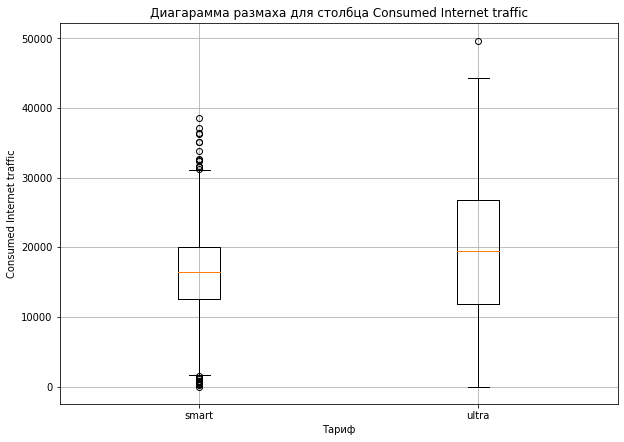

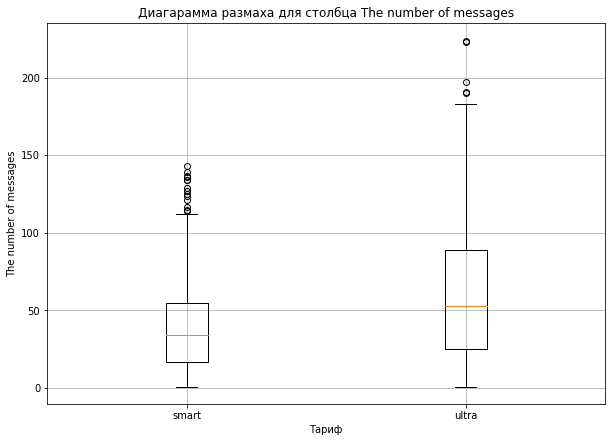

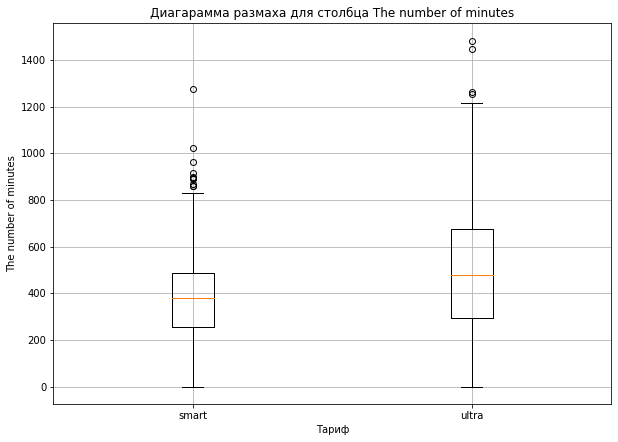

In [96]:
for name in ['Consumed Internet traffic', 'The number of messages', 'The number of minutes']:
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(smart_tariff[name], positions =[1])
    plt.boxplot(ultra_tariff[name], positions =[2])
    plt.xlabel('Тариф')
    plt.ylabel(name)
    plt.xticks([1, 2], ['smart', 'ultra'])
    plt.grid()
    plt.title('Диагарамма размаха для столбца {}'.format(name))

Из таблицы статистик и диаграмм размаха видно, что потраченный объем интернет-траффика, сообщения и звонки у тарифа "Ультра" имеет большую дисперсию, по сравнению с тарифом "Смарт", значит, что разброс значений вокруг среднего значения больше у тарифа "Ультра".

Но, у более дешевого тарифа("Смарт") намного больше выбросов, так же медиана смещена в верх, что значит, что значения редкие.

Построим теперь гистаграммы.

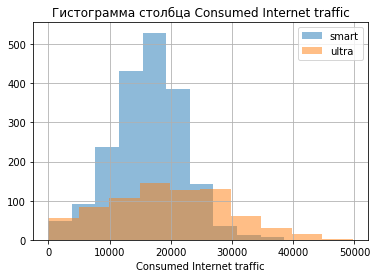

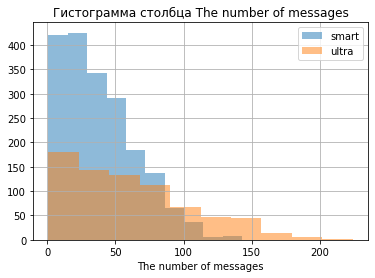

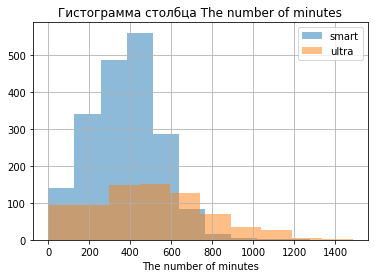

In [97]:
for element in ['Consumed Internet traffic', 'The number of messages', 'The number of minutes']:
    
    plt.hist(smart_tariff[element], alpha=0.5)
    plt.hist(ultra_tariff[element], alpha = 0.5)
    plt.xlabel(element)
    plt.legend(['smart', 'ultra'])
    plt.title('Гистограмма столбца {}'.format(element))
    plt.grid()
    plt.show()

Тариф "Смарт" имеет нормальное распредление данных по использованию интернет трафика в месяц. Тариф "Ультра" имеет большие диапазон значений, что нам сказало большее знаечение дисперсии. Мы можем видеть аналогичное поведение на остальных графиках тоже.

Также можем заметить, что у тарифа смарт на графике явно выражена мода, особенно у данных об использовании интернет трафика и минут разговора.

Можем сделать выбор, что у людей, предпочитающих более дорогой тариф, нет таких строгих ограничей, они не так следят за тем, сколько потратили минут, сообщений и Мб интернет-трафика, поэтому разброс значений больше, дисперсия больше. Что не сказать о тех людях, которые приобретаю более дешевый тариф, у них есть четкие рамки в использовании данных параметров, а значит они будут стремится не выйти за рамки, чем обусловлена выраженная мода на графиках.

<a id='hypothesis'></a>
### Шаг 4. Проверка гипотез

Начну с формирования нулевой гипотезы H₀. Она звучит так: Средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая.

Исходя из H₀ сформирую альтернативную гипотезу H₁, которая будет звучит так: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

В нашем случае генеральных совокупностей две. Мне нужно сопоставить их среднее. Применю метод **scipy.stats.ttest_ind()**

In [99]:
ttest_ultra = avr_data.query('tariff=="ultra"')
ttest_smart = avr_data.query('tariff=="smart"')


Проведу проверку дисперсии выборок


In [100]:
from scipy.stats import levene

In [101]:
stat, p = levene(ttest_ultra['proceed'], ttest_smart['proceed'])
p

3.979493821356363e-16


Такое маленькое значение говорит о том, что выборки не имеют одинаковые дисперсиию


In [102]:
np.var(ttest_ultra['proceed'], ddof=1)

71434.15906127772

In [103]:
np.var(ttest_smart['proceed'], ddof=1)

501046.5253261431

In [104]:
alpha = .05

In [105]:
results = st.ttest_ind(ttest_ultra['proceed'], ttest_smart['proceed'], equal_var=False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4201326414582815e-53
Отвергаем нулевую гипотезу


Посмотрию на среднюю вырочку по тарифам

In [106]:
avr_data.pivot_table(index='tariff', values='proceed', aggfunc='median')

,proceed
tariff,
smart,1005.078125
ultra,1950.000000


Действительно, видно, что средняя выручка у тарифа "Смарт" в 1,8 раза меньше, чем у тарифа "Ультра".

Проверю следующую гипотезу, формирую нулевую гипотезу H₀, которая звучит так: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Исходя их нулевой гипотезы, сформирую альтернативную гипотезу H₁: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [107]:
ttest_moscow = avr_data.query('city == "москва"')
ttest_region = avr_data.query('city != "москва"')


In [108]:
stat, p = levene(ttest_moscow['proceed'], ttest_region['proceed'])
p

0.6814214704733346

In [109]:
np.var(ttest_moscow['proceed'], ddof=1)

436867.66644224845

In [110]:
np.var(ttest_region['proceed'], ddof=1)

550203.860019762

Видно, что дисперсия у выборок не одинаковая тоже.

In [111]:

result_mos_reg = st.ttest_ind(ttest_moscow['proceed'], ttest_region['proceed'], equal_var=False)
print('p-значение: {}'.format(result_mos_reg.pvalue))

if (result_mos_reg.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6593067785654163
Не получилось отвергнуть нулевую гипотезу


Посмотрим на числа в столбце.

In [112]:
def mos_region(row):
    
    city = row['city']
    if city == 'москва':
        return 'москва'
    else:
        return 'регионы'
avr_data['mos_region'] = avr_data.apply(mos_region, axis=1)

In [113]:
avr_data.pivot_table(index='mos_region', values='proceed', aggfunc='median')

,proceed
mos_region,
москва,1443.847656
регионы,1342.828125


Действительно, видим, что отличие в 40 рублей, что довольно незначительно. Потвердили еще раз, что нулевую гипотезу не получилось отвергнуть, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

<a id='conclusion'></a>
### Шаг 5. Общий вывод.

Во время проведенной работы были изучены данные, выявлены пропуски, ошибки, они были обработаны. Выделяющиеся нулевые значения в таблице calls и internet было решено оставить, не удалять и никак не обрабатывать. Также был заменен тип данных, где необходимо, для удобной работы с данными.

Для каждого пользователя были посчитаны:
* количество сделанных звонков и израсходованных минут разговора по месяцам;
* количество отправленных сообщений по месяцам;
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя.
Таблицы были объедененны в одну для дальнейшей удобной работы и нагляности полученных результатов.

Были посчитаны: среднее количество, дисперсию и стандартное отклонение.
Построены диаграммы размаха и гистограммы. Сделан вывод, что тариф "Ультра" имеет большую дисперсию по параметрам( звонки, сообщения, объем потраченного интернет трафика), чем тариф "Смарт". У тарифа "Смарт" намного больше выбросов, что говорит о том, что людям, которые им пользуются, недостаточно предоставленных минут, сообщений и объема интренет трафика в месяц. Разброс значений больше у тарифа "Ультра", что говорит о том, что люди, пользующиеся им, не всегда используют по полной, поэтому диапазон значений у него больше, чем у тарифа "Смарт".

Также, я выяснила, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. А вот средняя выручка между Москвой и другими регионами практически не отличается.

Как мы узнали, больший доход компания "Мегалайн" получает с тарифа "Ультра", клиенты не расходуют весь предоставленный им пакет параметров, что значит, что им не нужно доплачивать сверх месячной платы. Этот тариф приносит компании больше денег. Но, количество пользователей у тарифа "Смарт" больше, почти в 3 раза. 

In [114]:
rev_piv_table = avr_data.pivot_table(index='tariff', values='proceed', aggfunc=['count', 'sum'])
rev_piv_table.columns = ['Кол-во пользователей', 'Общая выручка тарифа']
rev_piv_table['% от общей выручки компании'] = (rev_piv_table['Общая выручка тарифа'] / \
                                               rev_piv_table['Общая выручка тарифа'].sum()).\
map(lambda x:"{0:.1%}".format(x))
rev_piv_table


,Кол-во пользователей,Общая выручка тарифа,% от общей выручки компании
tariff,,,
smart,301,355844.835938,59.7%
ultra,118,240150.000000,40.3%


Видно, что тариф "Смарт" приносит 60 процентов от общей выручки всей компании.

Значит, что для компании тариф "Смарт" выгоднее.